In [1]:
from BayesNet import BayesNet
from BNReasoner import BNReasoner
import networkx as nx
import pandas as pd
import copy

In [2]:
#TD: If at some point you get a "omp Error #15," try running this code. It worked for me, but apparently it is not the best solution as it can cause problems, so use with "caution" I suppose 

#import os 
#os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
covid = BayesNet()
covid.load_from_bifxml('testing/Use_Case.BIFXML')

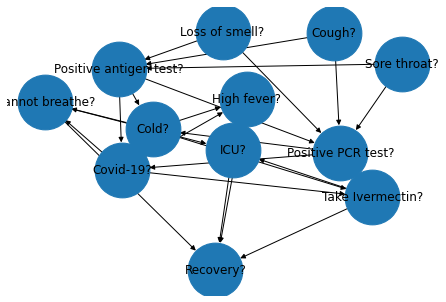

In [4]:
covid.draw_structure()

In [5]:
covid.get_all_variables()

['Cough?',
 'Loss of smell?',
 'Sore throat?',
 'Positive PCR test?',
 'Positive antigen test?',
 'Covid-19?',
 'Cold?',
 'Cannot breathe?',
 'High fever?',
 'Take Ivermectin?',
 'ICU?',
 'Recovery?']

In [6]:
covid.get_all_cpts()

{'Cough?':    Cough?     p
 0   False  0.95
 1    True  0.05, 'Loss of smell?':    Loss of smell?     p
 0           False  0.99
 1            True  0.01, 'Sore throat?':    Sore throat?     p
 0         False  0.98
 1          True  0.02, 'Positive PCR test?':     Cough?  Loss of smell?  Sore throat?  Positive antigen test?  \
 0    False           False         False                   False   
 1    False           False         False                   False   
 2    False           False         False                    True   
 3    False           False         False                    True   
 4    False           False          True                   False   
 5    False           False          True                   False   
 6    False           False          True                    True   
 7    False           False          True                    True   
 8    False            True         False                   False   
 9    False            True         False        

In [7]:
covid.get_children('ICU?')

['Recovery?']

In [8]:
covid.get_all_edges()

[('Cough?', 'Positive PCR test?'),
 ('Cough?', 'Positive antigen test?'),
 ('Loss of smell?', 'Positive PCR test?'),
 ('Loss of smell?', 'Positive antigen test?'),
 ('Sore throat?', 'Positive PCR test?'),
 ('Sore throat?', 'Positive antigen test?'),
 ('Positive PCR test?', 'Cold?'),
 ('Positive PCR test?', 'Covid-19?'),
 ('Positive antigen test?', 'Positive PCR test?'),
 ('Positive antigen test?', 'Cold?'),
 ('Positive antigen test?', 'Covid-19?'),
 ('Covid-19?', 'Take Ivermectin?'),
 ('Covid-19?', 'High fever?'),
 ('Covid-19?', 'Cannot breathe?'),
 ('Cold?', 'Take Ivermectin?'),
 ('Cold?', 'High fever?'),
 ('Cold?', 'Cannot breathe?'),
 ('Cannot breathe?', 'ICU?'),
 ('Cannot breathe?', 'Recovery?'),
 ('High fever?', 'ICU?'),
 ('High fever?', 'Recovery?'),
 ('Take Ivermectin?', 'ICU?'),
 ('Take Ivermectin?', 'Recovery?'),
 ('ICU?', 'Recovery?')]

## a) d-separation 

In [9]:
reasoner = BNReasoner(covid)

In [10]:
x = ['Sore throat?', 'Cold?']
y = ['Cough?', 'ICU?']
z = ['Take Ivermectin?']
reasoner.d_separation(x, y, z)

False

## b) Ordering

In [11]:
print('Mindegree heuristic: ')
reasoner.ordering_mindegree(covid)

Mindegree heuristic: 


['Cough?',
 'Loss of smell?',
 'Sore throat?',
 'Positive PCR test?',
 'Positive antigen test?',
 'Covid-19?',
 'Cold?',
 'Cannot breathe?',
 'High fever?',
 'Take Ivermectin?',
 'ICU?',
 'Recovery?']

In [12]:
print('Minfill heuristic: ')

reasoner.ordering_minfill(covid)

Minfill heuristic: 


['Cough?',
 'Loss of smell?',
 'Sore throat?',
 'Positive PCR test?',
 'Positive antigen test?',
 'Covid-19?',
 'Cold?',
 'Cannot breathe?',
 'High fever?',
 'Take Ivermectin?',
 'ICU?',
 'Recovery?']

# c) Network Pruning

In [13]:
q = ['ICU?']
e = pd.Series({'Covid-19?': True, 'Cold?': False})

pruned = reasoner.net_prune(q, e)

In [14]:
pruned.get_cpt('ICU?')

,Cannot breathe?,High fever?,Take Ivermectin?,ICU?,p
0,False,False,False,False,0.9990
1,False,False,False,True,0.0010
2,False,False,True,False,0.9991
3,False,False,True,True,0.0009
4,False,True,False,False,0.7000
5,False,True,False,True,0.3000
6,False,True,True,False,0.4001
7,False,True,True,True,0.5999
8,True,False,False,False,0.7000
9,True,False,False,True,0.3000


## d) Marginal distributions

### summing-out: 

In [15]:
factor = covid.get_cpt('ICU?')
factor

,Cannot breathe?,High fever?,Take Ivermectin?,ICU?,p
0,False,False,False,False,0.9990
1,False,False,False,True,0.0010
2,False,False,True,False,0.9991
3,False,False,True,True,0.0009
4,False,True,False,False,0.7000
5,False,True,False,True,0.3000
6,False,True,True,False,0.4001
7,False,True,True,True,0.5999
8,True,False,False,False,0.7000
9,True,False,False,True,0.3000


In [16]:
reasoner.sum_out(factor, ['ICU?'])

,Cannot breathe?,High fever?,Take Ivermectin?,p
0,False,False,False,1.0
1,False,False,True,1.0
2,False,True,False,1.0
3,False,True,True,1.0
4,True,False,False,1.0
5,True,False,True,1.0
6,True,True,False,1.0
7,True,True,True,1.0


### multiplying

In [17]:
hospital = covid.get_cpt('ICU?')
hospital

,Cannot breathe?,High fever?,Take Ivermectin?,ICU?,p
0,False,False,False,False,0.9990
1,False,False,False,True,0.0010
2,False,False,True,False,0.9991
3,False,False,True,True,0.0009
4,False,True,False,False,0.7000
5,False,True,False,True,0.3000
6,False,True,True,False,0.4001
7,False,True,True,True,0.5999
8,True,False,False,False,0.7000
9,True,False,False,True,0.3000


In [18]:
Joe_Rogan = covid.get_cpt('Take Ivermectin?')
Joe_Rogan

,Covid-19?,Cold?,Take Ivermectin?,p
0,False,False,False,1.000
1,False,False,True,0.000
2,False,True,False,0.995
3,False,True,True,0.005
4,True,False,False,0.950
5,True,False,True,0.050
6,True,True,False,0.950
7,True,True,True,0.050


In [19]:
hospital = covid.get_cpt('ICU?')
Joe_Rogan = covid.get_cpt('Take Ivermectin?')

In [20]:
reasoner.mult([Joe_Rogan, hospital])

(    Covid-19?  Cold?  Take Ivermectin?  Cannot breathe?  High fever?   ICU?  \
 0       False  False             False            False        False  False   
 1       False  False             False            False        False   True   
 2       False  False             False            False         True  False   
 3       False  False             False            False         True   True   
 4       False  False             False             True        False  False   
 ..        ...    ...               ...              ...          ...    ...   
 59       True   True              True            False         True   True   
 60       True   True              True             True        False  False   
 61       True   True              True             True        False   True   
 62       True   True              True             True         True  False   
 63       True   True              True             True         True   True   
 
            p  
 0   0.999000  
 1   0

### get marginal

In [21]:
evidence = pd.Series({"Cold?": False, "Sore throat?": False})
query_vars = ["Recovery?", "ICU?"]

marginals = reasoner.get_marginal_distribution('random', query_vars, evidence)

In [22]:
marginals

,ICU?,Recovery?,p
0,False,False,0.002054
0,False,True,0.990878
0,True,False,0.001962
0,True,True,0.005106


In [23]:
0.002054 + 0.990878 + 0.001962 + 0.005106

1.0

## MPE

In [24]:
reasoner.MPE('mindegree')

(          p Cough? Loss of smell? Sore throat? Positive PCR test?  \
 0  0.830848  False          False        False              False   
 
   Positive antigen test? Covid-19?  Cold? Cannot breathe? High fever?  \
 0                  False     False  False           False       False   
 
   Take Ivermectin?   ICU? Recovery?  
 0            False  False      True  , 671, 0, 1028, 0.2590014934539795)

In [25]:
reasoner.MPE('minfill')

(          p Cough? Loss of smell? Sore throat? Positive PCR test?  \
 0  0.830848  False          False        False              False   
 
   Positive antigen test? Covid-19?  Cold? Cannot breathe? High fever?  \
 0                  False     False  False           False       False   
 
   Take Ivermectin?   ICU? Recovery?  
 0            False  False      True  , 671, 0, 1028, 0.27718353271484375)

In [26]:
reasoner.MPE('random')

(          p   ICU? Loss of smell?  Cold? Positive antigen test?  \
 0  0.830848  False          False  False                  False   
 
   Cannot breathe? Sore throat? Recovery? High fever? Positive PCR test?  \
 0           False        False      True       False              False   
 
   Take Ivermectin? Covid-19? Cough?  
 0            False     False  False  , 1269, 0, 1759, 0.3460226058959961)

In [27]:
reasoner.MAP('mindegree', map_vars = ['Covid-19?'])

(     p  Covid-19?
 0  1.0      False, 96, 68, 2, 0.0580143928527832)

In [28]:
reasoner.MAP('minfill', map_vars = ['Covid-19?'])

(     p  Covid-19?
 0  1.0      False, 96, 68, 2, 0.06565499305725098)

In [29]:
reasoner.MAP('random', map_vars = ['Covid-19?'])

(     p  Covid-19?
 0  1.0      False, 120, 92, 2, 0.05803346633911133)

### **A-priori marginal query**
#### What is the probability of 'ICU?' being True?

In [30]:
# evidence = pd.Series({"Cold?": False, "Sore throat?": False})
query_vars = ['ICU?']

marginalsRAN = reasoner.get_marginal_distribution('random', query_vars)
marginalsFILL = reasoner.get_marginal_distribution('minfill', query_vars)
marginalsDEG = reasoner.get_marginal_distribution('mindegree', query_vars)

marginalsRAN

,ICU?,p
0,False,0.991872
1,True,0.008128


In [31]:
marginalsFILL

,ICU?,p
0,False,0.991872
1,True,0.008128


In [32]:
marginalsDEG

,ICU?,p
0,False,0.991872
1,True,0.008128


### **A-posterior marginal query**
##### What is the difference between the probability of someone going into ICU given that they have Covid-19, 
##### vs. the probability of someone going to the ICU given they took Ivermectin and they have Covid-19?

In [34]:
evidence = pd.Series({'Sore throat?': True})
query_vars = ['ICU?']

mar = reasoner.get_marginal_distribution('random', query_vars, evidence)

evidence2 = pd.Series({'Covid-19?': True, 'Take Ivermectin?': True})
query_vars2 = ['ICU?']

mar2 = reasoner.get_marginal_distribution('random', query_vars2, evidence2)

In [35]:
mar

,ICU?,p
0,False,0.94637
0,True,0.05363


In [36]:
mar2

,ICU?,p
0,False,0.866041
1,True,0.133959


### **MAP query**
##### What is the most likely instantiation of Covid-19 and ICU given that a person has cough, loss of smell, and a sore throat

In [37]:
map_vars = ['Covid-19?', 'ICU?']
e_vars = pd.Series({'Cough?': True, 'Loss of smell?': True, 'Sore throat?': True})

uc_map = reasoner.MAP('random', map_vars=map_vars, e_vars=e_vars)

uc_map

# is MAP supposed to change output every time?
# What are the 3 bottom numbers?

(  Covid-19?   ICU?         p
 0     False  False  0.985459, 204, 206, 6, 0.11399722099304199)

### **MPE query**
##### What is the most likely instantiation of all variables given that a person tests positive on the PCR test and positive on the antigen test.

In [ ]:
reasoner.MPE('mindegree', pd.Series({'Positive PCR test?': True, 'Positive antigen test?':True}))
